<b> Time series Lag variable check for forecasting </b>

# Imports

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
book_store_path = 'Data/book_sales.csv' # Books store data path

book_sale_df = pd.read_csv(book_store_path)

print("shape of df ->", book_sale_df.shape)

book_sale_df.head()

shape of df -> (30, 3)


,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [15]:
book_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       30 non-null     object
 1   Paperback  30 non-null     int64 
 2   Hardcover  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [4]:
book_sale_df.describe()

,Paperback,Hardcover
count,30.000000,30.000000
mean,186.400000,198.833333
std,35.480543,40.301522
min,111.000000,128.000000
25%,167.250000,170.500000
50%,189.000000,200.500000
75%,207.250000,222.000000
max,247.000000,283.000000


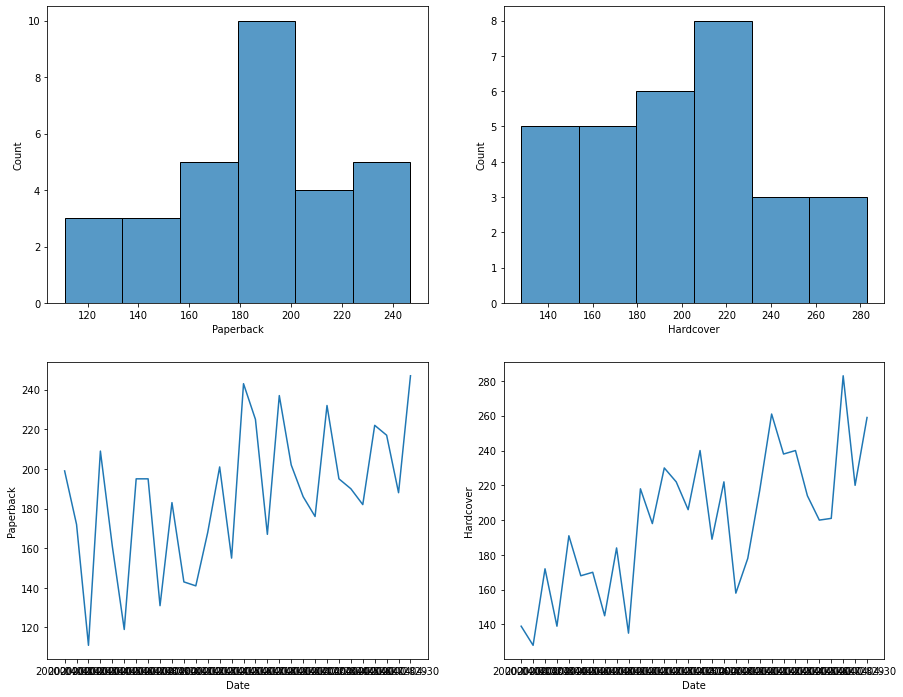

In [13]:
fig, ax = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)

sns.histplot(data = book_sale_df, x='Paperback', ax = ax[0,0])
sns.histplot(data = book_sale_df, x='Hardcover', ax = ax[0,1])


sns.lineplot(data = book_sale_df, x='Date', y='Paperback', ax = ax[1,0])
sns.lineplot(data = book_sale_df, x='Date', y='Hardcover', ax = ax[1,1])


plt.show()

In [18]:
#Since we have only 30 days data lets have a day column

book_sale_df['dayIndex'] = pd.to_datetime(book_sale_df['Date']).dt.day

In [20]:
book_sale_df.head()

,Date,Paperback,Hardcover,dayIndex
0,2000-04-01,199,139,1
1,2000-04-02,172,128,2
2,2000-04-03,111,172,3
3,2000-04-04,209,139,4
4,2000-04-05,161,191,5


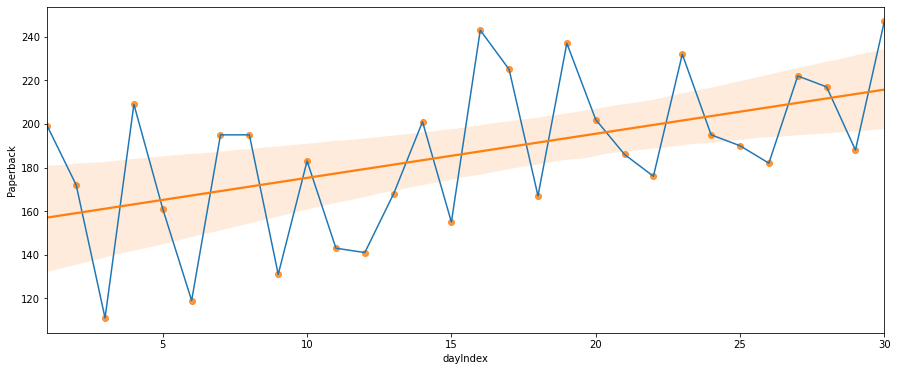

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot('dayIndex', 'Paperback', data= book_sale_df)
ax = sns.regplot(data=book_sale_df, x='dayIndex', y='Paperback')

plt.show()

In [31]:
#lets have lag variable for paperback

book_sale_df['Paperback_lag_1'] = book_sale_df['Paperback'].shift(1)

book_sale_df['Hardcover_lag_1'] = book_sale_df['Hardcover'].shift(1)

book_sale_df.head()

,Date,Paperback,Hardcover,dayIndex,paperback_lag_1,Paperback_lag_1,Hardcover_lag_1
0,2000-04-01,199,139,1,NaN,NaN,NaN
1,2000-04-02,172,128,2,199.0,199.0,139.0
2,2000-04-03,111,172,3,172.0,172.0,128.0
3,2000-04-04,209,139,4,111.0,111.0,172.0
4,2000-04-05,161,191,5,209.0,209.0,139.0


<AxesSubplot:xlabel='paperback_lag_1', ylabel='Paperback'>

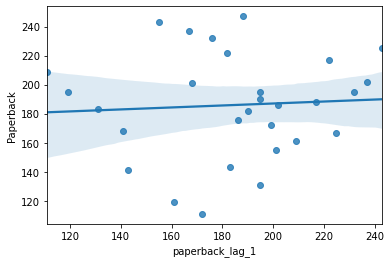

In [30]:


sns.regplot(x="Paperback_lag_1", y="Paperback", data=book_sale_df )

<AxesSubplot:xlabel='Hardcover_lag_1', ylabel='Hardcover'>

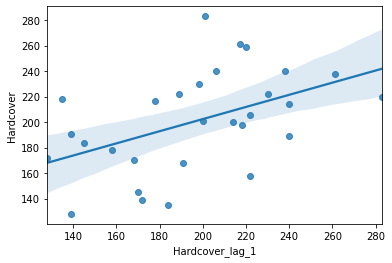

In [32]:


sns.regplot(x="Hardcover_lag_1", y="Hardcover", data=book_sale_df )

In [ ]:
# So looks like there is a linear relation with lad, which shows that my previous day sales 
# has impact on present day sales


